In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ranksums

In [2]:
all_puncta=pd.read_csv("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/Confocal/image analysis /ATG9a_analysis_stat/puncta_quantification_results_ATG9_HA.csv")
all_puncta =all_puncta[all_puncta['Overlap_Puncta'] != 0]

df=pd.read_csv("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/Confocal/image analysis /ATG9a_analysis_stat/all_puncta_sizes_ATG9.csv")
B_filtered = pd.merge(df, all_puncta[['Image', 'Cell']], on=['Image', 'Cell'], how='inner')

,Replicate,Condition,Image,Cell,Puncta_Size
0,replicate_3,3E,16392,cell_2,0.053553
1,replicate_3,3E,16392,cell_2,0.088424
2,replicate_3,3E,16392,cell_2,0.054798
3,replicate_3,3E,16392,cell_2,0.087179
4,replicate_3,3E,16392,cell_2,0.061025
...,...,...,...,...,...
14968,replicate_1,wt,15735,cell_4,0.330034
14969,replicate_1,wt,15735,cell_4,0.158167
14970,replicate_1,wt,15735,cell_4,0.061025
14971,replicate_1,wt,15735,cell_4,0.083443


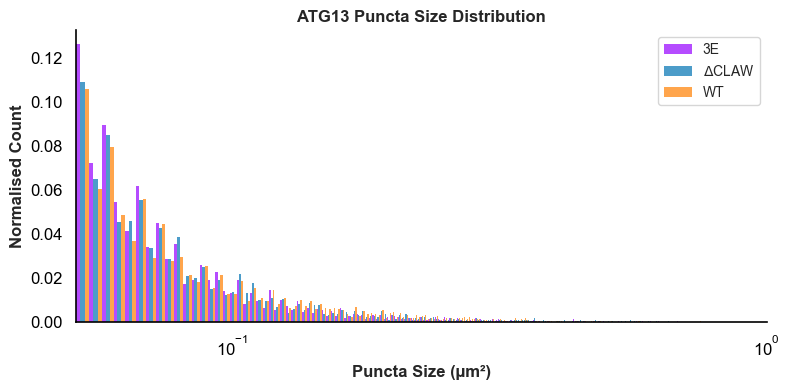

In [5]:
# Function to load data and plot normalized histogram
def plot_normalized_histogram_cut(B_filtered, condition_col='Condition', size_col='Puncta_Size', num_bin=1000, x_limit=3):
    # Load the CSV file into a DataFrame
    df = B_filtered.copy()

    df['Condition'] = df['Condition'].replace({'wt': 'WT', "delta_claw":r'$\Delta$CLAW'})

    data_normalised = []

    unique_conditions = df[condition_col].unique()
    n_conditions = len(unique_conditions)

    # Computing the bin properties (same for both distributions)
    bin_lims = np.linspace(0, x_limit, num_bin + 1)
    bin_centers = 0.5 * (bin_lims[:-1] + bin_lims[1:])
    bin_widths = bin_lims[1:] - bin_lims[:-1]

    plt.figure(figsize=(8, 4))

    custom_palette = ["#9600FF", "#0072B2", "#FF7F00"]
    bar_width = bin_widths[0] / n_conditions  # Adjust bar width to ensure they fit in each bin

    for idx, condition in enumerate(unique_conditions):
        sizes = df[df[condition_col] == condition][size_col]

        # Compute the histogram
        hist, _ = np.histogram(sizes, bins=bin_lims)

        # Normalize the histogram by the number of puncta in each condition
        hist_norm = hist / np.sum(hist)

        # Offset the bar positions for each condition to place bars side-by-side
        bar_positions = bin_centers - (bin_widths[0] / 2) + (idx + 0.5) * bar_width

        # Plot the normalized histogram
        plt.bar(bar_positions, hist_norm, width=bar_width, align='center', alpha=0.7,
                label=condition, color=custom_palette[idx % len(custom_palette)],edgecolor="None" )

    plt.xscale('log')
    plt.xlim(right=1, left=df["Puncta_Size"].min())
    plt.xlabel('Puncta Size')
    plt.ylabel('Probability')
    plt.title('Normalized Histogram of Puncta Sizes on Log Scale (Linear Bins, Cut at $10$)')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set black color for axis labels
    ax.spines["bottom"].set_color('black')
    ax.spines["bottom"].set_linewidth(1.2)

    ax.spines["left"].set_color('black')
    ax.spines["left"].set_linewidth(1.2)

    ax.grid(axis='y', which='major', color='white', linestyle='-', linewidth=0.0)
    ax.grid(axis='x', which='major', color='white', linestyle='-', linewidth=0.0)
    ax.tick_params(axis='both', which='major', length=6, width=1.2, colors='black', labelsize=12)

    ax.xaxis.set_tick_params(width=1.2, size=6)
    ax.yaxis.set_tick_params(width=1.2, size=6)
    plt.ylabel("Normalised Count", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})
    plt.xlabel("Puncta Size (µm²)", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})
    plt.title("ATG13 Puncta Size Distribution", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})
    plt.legend()

    plt.tight_layout()

# Replace 'your_dataset_path.csv' with the path to your CSV file
# Call the function to plot the histogram with the specified parameters
plot_normalized_histogram_cut(B_filtered)

plt.tight_layout()
plt.savefig("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/Confocal/image analysis /ATG9a_analysis_stat/Histogram /ATG9/histogram.png", dpi=300)
plt.show()

replicate_3
replicate_2
replicate_1


<Axes: xlabel='Condition', ylabel='lamda'>

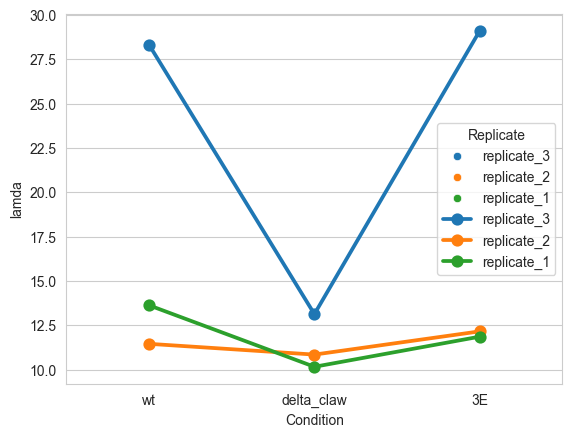

In [5]:
lamda_data=[]
df=B_filtered.copy()

for replicate in df["Replicate"].unique():
    print(replicate)
    data_to_calculate=df[(df["Replicate"]==replicate) & (df["Condition"]=="wt")]
    loc, scale = stats.expon.fit(data_to_calculate["Puncta_Size"])
    lamda=1/scale
    lamda_data.extend([{'Replicate': replicate, 'Condition': "wt",
                             'lamda':lamda,"loc":loc, "scale":scale}])

for replicate in df["Replicate"].unique():
    data_to_calculate=df[(df["Replicate"]==replicate) & (df["Condition"]=="delta_claw")]
    loc, scale = stats.expon.fit(data_to_calculate["Puncta_Size"])
    lamda=1/scale
    lamda_data.extend([{'Replicate': replicate, 'Condition': "delta_claw",
                             'lamda':lamda,"loc":loc, "scale":scale}])

for replicate in df["Replicate"].unique():
    data_to_calculate=df[(df["Replicate"]==replicate) & (df["Condition"]=="3E")]
    loc, scale = stats.expon.fit(data_to_calculate["Puncta_Size"])
    lamda=1/scale
    lamda_data.extend([{'Replicate': replicate, 'Condition': "3E",
                             'lamda':lamda,"loc":loc, "scale":scale}])

lamda_data_frame=pd.DataFrame(lamda_data)

sns.scatterplot(data=lamda_data_frame,x="Condition",y="lamda", hue="Replicate")
sns.pointplot(data=lamda_data_frame,x="Condition",y="lamda", hue="Replicate")

In [6]:
lamda_data_frame.to_csv("")

,Replicate,Condition,lamda,loc,scale
0,replicate_3,wt,28.316153,0.051062,0.035316
1,replicate_2,wt,11.460978,0.051062,0.087253
2,replicate_1,wt,13.633106,0.051062,0.073351
3,replicate_3,delta_claw,13.136710,0.051062,0.076123
4,replicate_2,delta_claw,10.854075,0.051062,0.092131
5,replicate_1,delta_claw,10.166758,0.051062,0.098360
6,replicate_3,3E,29.107111,0.051062,0.034356
7,replicate_2,3E,12.163862,0.051062,0.082211
8,replicate_1,3E,11.864664,0.051062,0.084284
